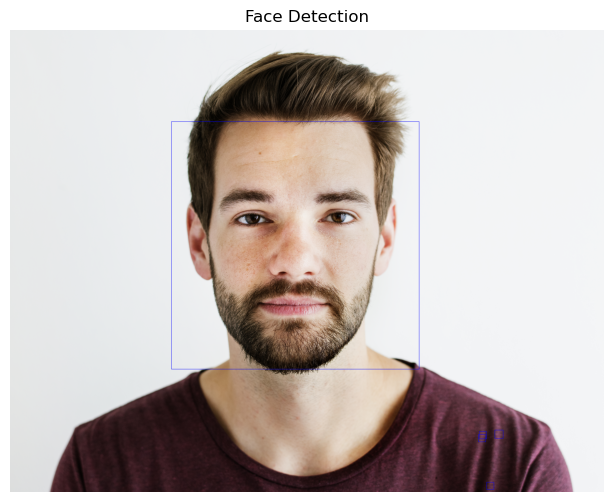

In [1]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = "C:/Users/LENOVO/Downloads/1.jpg"  # Update with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Face Detection")
    plt.show()


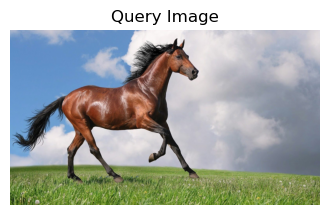

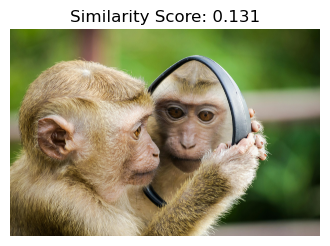

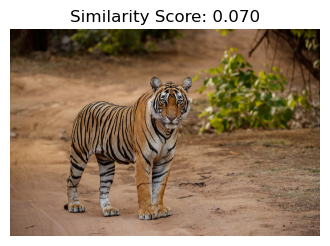

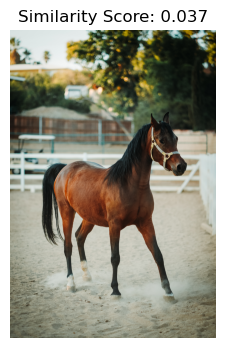

In [2]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

query_path = "C:/Users/LENOVO/OneDrive/Desktop/pics/0x0-horses-the-wings-of-mankind-1527015927739.jpg" #update with image path

if not os.path.exists(query_path):
    raise FileNotFoundError(f"Query image not found: {query_path}")

query_image = cv2.imread(query_path)
query_features = extract_color_histogram(query_image)

image_paths = ["C:/Users/LENOVO/OneDrive/Desktop/pics/shallow-focus-vertical-shot-brown-horse-wearing-harness-walking-sandy-ground.jpg",  #update with image path
               "C:/Users/LENOVO/OneDrive/Desktop/pics/tiger-nature-habitat-tiger-male-walking-head-composition-wildlife-scene-with-danger-animal-hot-summer-rajasthan-india-dry-trees-with-beautiful-indian-tiger-panthera-tigris.jpg",  #update with image path
               "C:/Users/LENOVO/OneDrive/Desktop/pics/pexels-andre-mouton-1207875.jpg"] #update with image path
dataset = []

for path in image_paths:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Dataset image not found: {path}")
    dataset.append(cv2.imread(path))

dataset_features = [extract_color_histogram(img) for img in dataset]

similarities = [
    cosine_similarity([query_features], [features])[0][0]
    for features in dataset_features
]

ranked_indices = sorted(
    range(len(similarities)),
    key=lambda i: similarities[i],
    reverse=True
)

plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
plt.title("Query Image")
plt.axis("off")
plt.show()

for i in ranked_indices:
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(dataset[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Similarity Score: {similarities[i]:.3f}")
    plt.axis("off")
    plt.show()


In [3]:
import numpy as np

# Sample dataset
data = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])

def auto_scale(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    return (data - mean) / std_dev

def auto_correlation(data):
    return np.corrcoef(data, rowvar=False)

def feature_weighting(data):
    variance = np.var(data, axis=0)
    return data * variance

scaled_data = auto_scale(data)
print("Standardized Data:")
print(scaled_data)

correlation_matrix = auto_correlation(scaled_data)
print("\nAuto-correlation Matrix:")
print(correlation_matrix)

weighted_data = feature_weighting(scaled_data)
print("\nWeighted Data:")
print(weighted_data)


Standardized Data:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]

Auto-correlation Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Weighted Data:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

def perform_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans.labels_

def perform_pca(X, n_components=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

def build_and_train_ann(X, y, epochs=50, batch_size=5):
    y_categorical = to_categorical(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_categorical, test_size=0.2, random_state=42
    )

    model = Sequential()
    model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'ANN Classification Accuracy: {accuracy * 100:.2f}%')

    predictions = model.predict(X_test)
    return model, predictions

cluster_labels = perform_kmeans(X)
print("Cluster Labels:")
print(cluster_labels)

X_pca = perform_pca(X)
print("\nPCA Transformed Data:")
print(X_pca)

ann_model, ann_predictions = build_and_train_ann(X_pca, y)
print("\nANN Predictions:")
print(np.argmax(ann_predictions, axis=1))


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

PCA Transformed Data:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22

YOLOv8 model loaded successfully!

image 1/1 C:\Users\LENOVO\OneDrive\Desktop\pics\BicycleRider-186x200.jpg: 640x608 1 person, 1 bicycle, 827.7ms
Speed: 29.6ms preprocess, 827.7ms inference, 33.5ms postprocess per image at shape (1, 3, 640, 608)


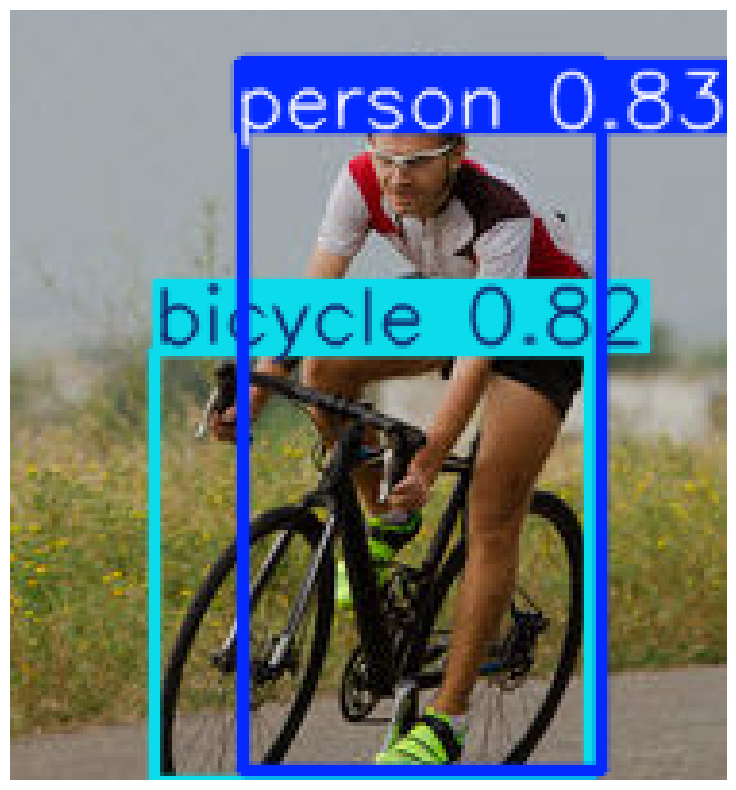


image 1/1 C:\Users\LENOVO\OneDrive\Desktop\pics\BicycleRider-186x200.jpg: 640x608 1 person, 1 bicycle, 746.4ms
Speed: 27.7ms preprocess, 746.4ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 608)
Results saved to C:\Windows\System32\runs\detect\predict
Output saved inside 'runs/detect/predict' folder.


In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("yolov8n.pt")
print("YOLOv8 model loaded successfully!")

image_path = "C:/Users/LENOVO/OneDrive/Desktop/pics/BicycleRider-186x200.jpg"  # replace with your image path
results = model(image_path)  

output_image = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis("off")
plt.show()

model.predict(source=image_path, save=True)
print("Output saved inside 'runs/detect/predict' folder.")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 53ms/step - accuracy: 0.8813 - loss: 0.3554 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 56ms/step - accuracy: 0.9799 - loss: 0.0655 - val_accuracy: 0.9874 - val_loss: 0.0433
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9836 - loss: 0.0538
Reached 98.1% accuracy so stopping training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 58ms/step - accuracy: 0.9836 - loss: 0.0538 - val_accuracy: 0.9905 - val_loss: 0.0301


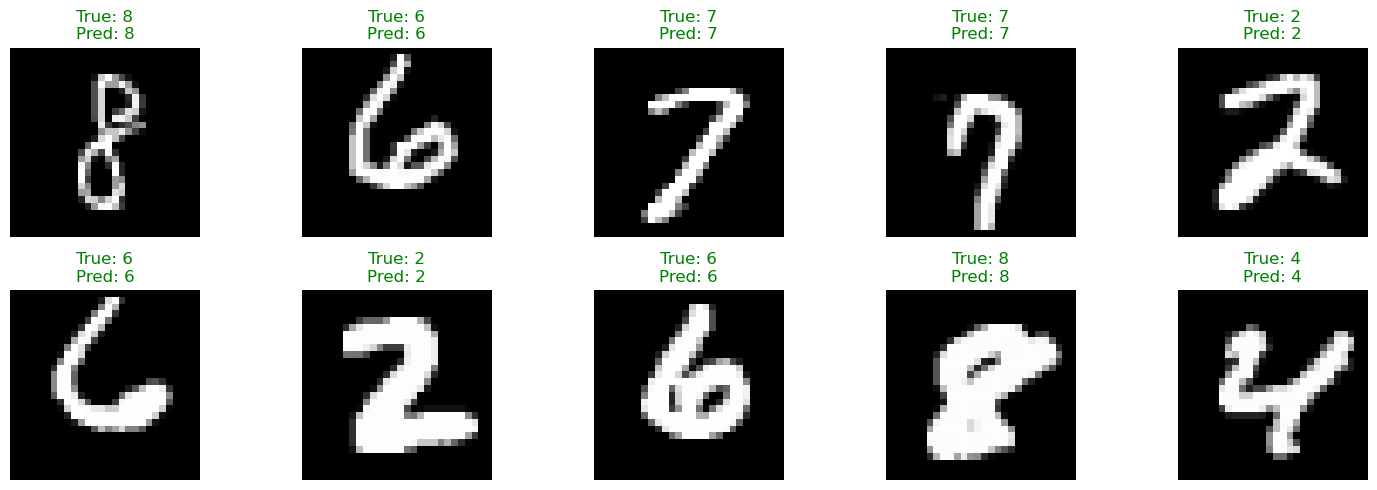

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Load and Preprocess Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape to be (batch_size, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

# 2. Define the Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 3. Define Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.981:
            print("\nReached 98.1% accuracy so stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

# 4. Train the Model
history = model.fit(X_train, Y_train_cat, epochs=5,
                    validation_data=(X_test, Y_test_cat),
                    callbacks=[callbacks],
                    verbose=1)

# ---------------------------------------------------------
# NEW SECTION: Prediction on MNIST Data (Jupyter Compatible)
# ---------------------------------------------------------

# Select 10 random indices from the test set
num_samples = 10
indices = np.random.choice(range(len(X_test)), num_samples, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    # Grab the image and the actual label
    image_data = X_test[idx]
    true_label = Y_test[idx]  # Original label (not one-hot)
    
    # Reshape the image for the model (1, 28, 28, 1)
    # The model expects a batch, so we add a dimension
    prediction_input = np.expand_dims(image_data, axis=0)
    
    # Predict
    prediction = model.predict(prediction_input, verbose=0)
    predicted_label = np.argmax(prediction)
    
    # Display
    plt.subplot(2, 5, i + 1) # Create a subplot grid (2 rows, 5 cols)
    plt.imshow(image_data.reshape(28, 28), cmap='gray')
    
    # Set title color to green if correct, red if wrong
    title_color = 'green' if predicted_label == true_label else 'red'
    
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Load Data
print("Loading data... (this might take a moment if downloading)")
ds_train, ds_test = tfds.load('emnist/letters', split=['train', 'test'], as_supervised=True)

def tfds_to_numpy(ds):
    X, y = [], []
    for img, label in tfds.as_numpy(ds):
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)

X_train, Y_train = tfds_to_numpy(ds_train)
X_test, Y_test = tfds_to_numpy(ds_test)

# --- SPEED FIX: USE ONLY A SUBSET OF DATA ---
# We use only the first 5,000 images for training to make it fast
X_train = X_train[:5000]
Y_train = Y_train[:5000]
# Use only 1,000 images for testing
X_test = X_test[:1000]
Y_test = Y_test[:1000]

print(f"Subset Training shape: {X_train.shape}")

# 2. Preprocess
Y_train -= 1
Y_test -= 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

Y_train = to_categorical(Y_train, num_classes=26)
Y_test = to_categorical(Y_test, num_classes=26)

# 3. Define Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)), # Removed one Conv layer to speed it up
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'), # Reduced from 512 to 128
    Dense(26, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 4. Train (Reduced Epochs to 3)
print("Starting training...")
history = model.fit(X_train, Y_train, epochs=3, 
                    validation_data=(X_test, Y_test),
                    verbose=1)

# 5. Prediction & Visualization
indices = np.random.choice(range(len(X_test)), 10, replace=False)
plt.figure(figsize=(15, 6))

def get_label(index):
    return chr(index + 65)

for i, idx in enumerate(indices):
    img_data = X_test[idx]
    true_label_idx = np.argmax(Y_test[idx])
    
    prediction_input = np.expand_dims(img_data, axis=0)
    prediction = model.predict(prediction_input, verbose=0)
    pred_label_idx = np.argmax(prediction)
    
    plt.subplot(2, 5, i + 1)
    # Rotate/Flip for human readability
    display_img = np.fliplr(np.rot90(img_data.reshape(28, 28), k=3))
    plt.imshow(display_img, cmap='gray')
    
    color = 'green' if pred_label_idx == true_label_idx else 'red'
    plt.title(f"True: {get_label(true_label_idx)}\nPred: {get_label(pred_label_idx)}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Loading data... (this might take a moment if downloading)
